<b> Practice Notebook based on Deep Learning Classification </b>

Exercise link : https://www.learnpytorch.io/02_pytorch_classification/

In [1]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

<b> Binary Classification </b>

In [2]:
from sklearn.datasets import make_moons

X , y = make_moons(n_samples=1000 , noise=0.3 , random_state=42)

In [3]:
X[:5] , y[:5]

(array([[-0.17186341,  0.59624885],
        [ 1.25328273, -0.26541353],
        [ 0.72322405,  0.2319425 ],
        [-0.06519764, -0.65519443],
        [-0.79949325,  0.55293543]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [4]:
len(X) , len(y)

(1000, 1000)

In [5]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x: 'float | ArrayLike', y: 'float | ArrayLike', s: 'float | ArrayLike | None' = None, c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None, marker: 'MarkerType | None' = None, cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, alpha: 'float | None' = None, linewidths: 'float | Sequence[float] | None' = None, *, edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None, plotnonfinite: 'bool' = False, data=None, **kwargs) -> 'PathCollection'
    A scatter plot of *y* vs. *x* with varying marker size and/or color.

    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.

    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.

        The 

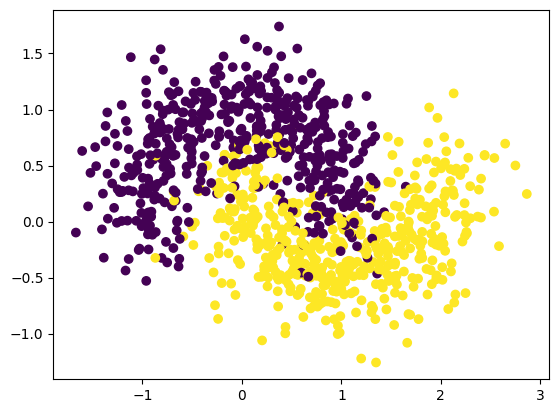

In [6]:
plt.scatter(X[: , 0] , X[: , 1] , c=y)

In [7]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(torch.float32, torch.float32, torch.float32, torch.float32)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [11]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2 , out_features=16 , dtype=torch.float),
            nn.ReLU(),
            nn.Linear(in_features=16 , out_features=16 , dtype=torch.float),
            nn.ReLU(),
            nn.Linear(in_features=16 , out_features=1 , dtype=torch.float)
        )
    
    def forward(self , X : torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [12]:
Model = MoonModel()

In [13]:
Model.eval()
with torch.inference_mode():
    logits = Model(X_train)

In [14]:
Model.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.0702,  0.2392],
                      [-0.6151, -0.2671],
                      [-0.6845,  0.0587],
                      [ 0.5257, -0.1801],
                      [ 0.4358, -0.2017],
                      [-0.1403,  0.0805],
                      [-0.0404, -0.5208],
                      [-0.4370, -0.4557],
                      [-0.2491, -0.0751],
                      [-0.4389, -0.2326],
                      [-0.6605, -0.1646],
                      [-0.4060, -0.5707],
                      [ 0.3796,  0.4397],
                      [-0.2000, -0.6792],
                      [ 0.6953,  0.0733],
                      [-0.0970,  0.6635]])),
             ('layer_stack.0.bias',
              tensor([-0.4744, -0.6503,  0.1980,  0.2398,  0.2832, -0.3899, -0.0490, -0.6391,
                      -0.3197, -0.1767, -0.5708, -0.6701, -0.1548, -0.5198, -0.1155,  0.5757])),
             ('layer_stack.2.weight',
              tensor([

In [15]:
loss_fn = nn.BCEWithLogitsLoss()
Optimizer = torch.optim.SGD(params=Model.parameters() , lr=0.1)

In [16]:
def accuracy_fn(y_true , y_pred):
    correct_preds = (y_true == y_pred).sum().item()
    acc = round((correct_preds / len(y_pred)) * 100)# accuracy(%)
    return acc

In [34]:
epochs = 1000

for epoch in range(epochs):

    Model.train()
    train_logits = Model(X_train).squeeze()
    train_pred = torch.round(torch.sigmoid(train_logits))

    loss = loss_fn(train_logits , y_train)
    acc = accuracy_fn(y_train , train_pred)

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()

    if epoch % 100 == 0:
        Model.eval()
        with torch.inference_mode():
            test_logits = Model(X_test).squeeze()
            test_pred = torch.sigmoid(test_logits).round()

            loss = loss_fn(test_logits , y_test)
            acc = accuracy_fn(y_test , test_pred)

            print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} %  |Test-Loss {loss_fn(test_logits , y_test)} | Test-Accuracy : {accuracy_fn(y_test , test_pred)} ")

Epoch : 0 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 100 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 200 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 300 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 400 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 500 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 600 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 700 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 800 | Loss : 614.2508544921875 | Accuracy : 90 %  |Test-Loss 614.2508544921875 | Test-Accuracy : 90 
Epoch : 900 | Loss : 

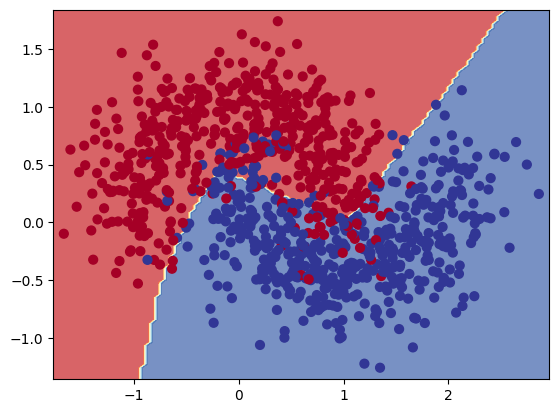

In [33]:
from helper_functions import plot_decision_boundary

plot_decision_boundary(Model , X , y) # after 2000 epochs of traning loop

<b> Mulit-class Classification </b>

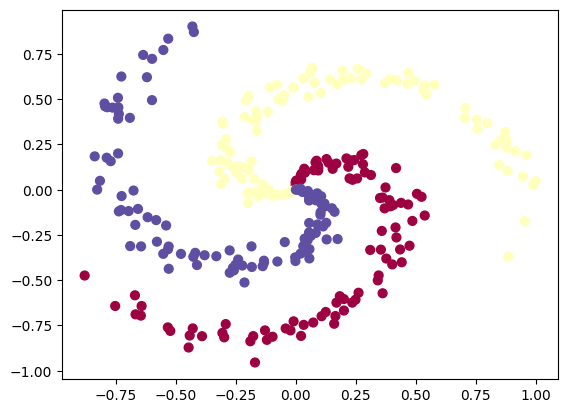

In [20]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_dots = np.zeros((N*K,D)) # data matrix (each row = single example)
y_dots = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_dots[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_dots[ix] = j
# lets visualize the data
plt.scatter(X_dots[:, 0], X_dots[:, 1], c=y_dots, s=40, cmap=plt.cm.Spectral)
plt.show()

In [21]:
X_dots = torch.from_numpy(X_dots).type(torch.float64)
y_dots = torch.from_numpy(y_dots).type(torch.LongTensor)

In [22]:
X_dots.dtype

torch.float64

In [23]:
X_dots[:5] , y_dots[:5]

(tensor([[ 0.0000,  0.0000],
         [-0.0016,  0.0100],
         [-0.0015,  0.0201],
         [ 0.0016,  0.0303],
         [-0.0012,  0.0404]], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0]))

In [24]:
X_dots.shape , y_dots.shape

(torch.Size([300, 2]), torch.Size([300]))

In [25]:
X_dots_train, X_dots_test, y_dots_train, y_dots_test = train_test_split(X_dots, y_dots, test_size=0.2, random_state=42)

In [26]:
X_dots_train.shape, X_dots_test.shape, y_dots_train.shape, y_dots_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [27]:
class SpiralModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=2 , out_features=8 , dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(in_features=8 , out_features=8 , dtype=torch.float64),
            nn.ReLU(),
            nn.Linear(in_features=8 , out_features=4 , dtype=torch.float64)
        )

    def forward(self , X: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [28]:
SpiralModel = SpiralModel()

In [29]:
loss_fn = nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(params=SpiralModel.parameters() , lr=0.1)

In [30]:
SpiralModel.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.0494,  0.2292],
                      [ 0.3121, -0.5980],
                      [ 0.5967,  0.5375],
                      [ 0.0524, -0.5114],
                      [ 0.5795,  0.4037],
                      [ 0.3066,  0.3015],
                      [-0.6422,  0.1914],
                      [ 0.7034, -0.6880]], dtype=torch.float64)),
             ('layer_stack.0.bias',
              tensor([ 0.1224, -0.0553,  0.0921,  0.0496,  0.6364,  0.4361, -0.3250, -0.6553],
                     dtype=torch.float64)),
             ('layer_stack.2.weight',
              tensor([[ 0.2463,  0.2390,  0.3464,  0.2938,  0.0417,  0.3352,  0.0650,  0.0696],
                      [-0.0411,  0.2963,  0.1783, -0.1161,  0.0484,  0.2883,  0.2359, -0.0381],
                      [-0.3210,  0.0874, -0.0919,  0.2651,  0.0809,  0.3288,  0.0292,  0.0461],
                      [ 0.2959,  0.1396,  0.1089,  0.1634, -0.1107,  0.3390, -0.1216, -0.3326],
     

In [31]:
epochs = 3000

for epoch in range(epochs):

    SpiralModel.train()
    train_logits = SpiralModel(X_dots_train)
    train_pred = torch.argmax(torch.softmax(train_logits , dim=1) , dim=1)

    loss = loss_fn(train_logits , y_dots_train)
    acc = accuracy_fn(y_dots_train , train_pred)

    Optimizer.zero_grad()

    loss.backward()

    Optimizer.step()

    if epoch % 250 == 0:
        SpiralModel.eval()
        with torch.inference_mode():
            test_logits = SpiralModel(X_dots_test)
            test_pred = torch.argmax(torch.softmax(test_logits , dim=1) , dim=1)

            test_loss = loss_fn(test_logits , y_dots_test)
            test_acc = accuracy_fn(y_dots_test , test_pred)

        
        print(f"Epoch : {epoch} | Loss : {loss} | Accuracy : {acc} %  |Test-Loss {test_loss} | Test-Accuracy : {test_acc} %")

Epoch : 0 | Loss : 1.367136395761314 | Accuracy : 32 %  |Test-Loss 1.3582916122451814 | Test-Accuracy : 37 %
Epoch : 250 | Loss : 0.7266397928869907 | Accuracy : 62 %  |Test-Loss 0.7532038181942381 | Test-Accuracy : 48 %
Epoch : 500 | Loss : 0.5505388017029972 | Accuracy : 70 %  |Test-Loss 0.6074059255636353 | Test-Accuracy : 55 %
Epoch : 750 | Loss : 0.3889895860710746 | Accuracy : 80 %  |Test-Loss 0.4348242706796057 | Test-Accuracy : 78 %
Epoch : 1000 | Loss : 0.26226490687967885 | Accuracy : 87 %  |Test-Loss 0.29685175651166384 | Test-Accuracy : 85 %
Epoch : 1250 | Loss : 0.18117118051891154 | Accuracy : 93 %  |Test-Loss 0.20526413370680563 | Test-Accuracy : 90 %
Epoch : 1500 | Loss : 0.13792513277558213 | Accuracy : 97 %  |Test-Loss 0.14695188874432216 | Test-Accuracy : 98 %
Epoch : 1750 | Loss : 0.112344180818826 | Accuracy : 97 %  |Test-Loss 0.11569708115095803 | Test-Accuracy : 97 %
Epoch : 2000 | Loss : 0.09556932125810445 | Accuracy : 98 %  |Test-Loss 0.09441366608946032 | Tes

Text(0.5, 1.0, 'Test')

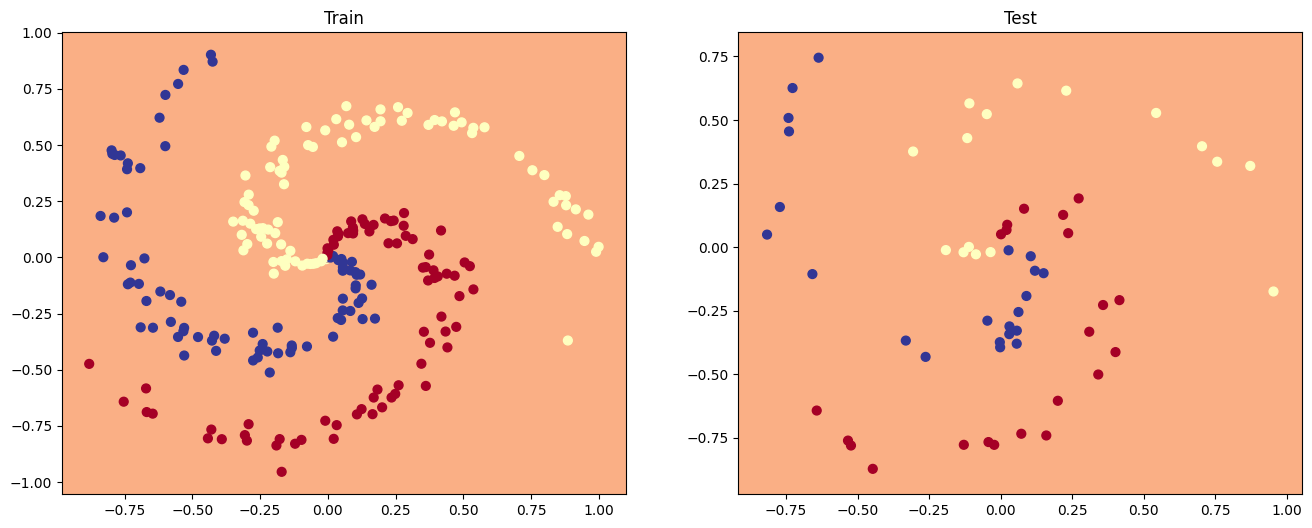

In [32]:
plt.figure(figsize=(16 , 6))

plt.subplot(1 , 2 , 1)
plot_decision_boundary(Model , X_dots_train , y_dots_train)
plt.title("Train")

plt.subplot(1 , 2 , 2)
plot_decision_boundary(Model , X_dots_test , y_dots_test)
plt.title("Test")